# Exercise sheet 6 - Solution
### 09/12/2022

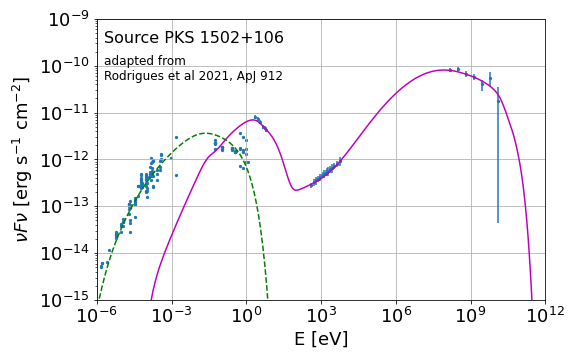

In [37]:
from IPython.display import Image
Image(filename='ex-06-example.png')

Blazars are a rare type of active supermassive black holes in the center of some galaxies. They emit a powerful jet of plasma and radiation towards Earth, and are the brightest extragalactic sources of gamma rays.

Source PKS 1502+106 is a powerful blazar lying 10 billion light years away. It has been observed by multiple instruments across the electromagnetic spectrum, from radio up to gamma rays. Some of these observations are summarized in the plot below.

In this simple exercise you will be reproducig this plot starting from (kind of) raw data.

The plot above shows a flux spectrum of blazar PKS 1502+106. This means that for each photon energy (shown in the x-axis), it shows the differential flux of photons of that energy that arrive from the source (in other words, the amount of energy per time and per area detected by a telescope in a given energy range). 

The above plot shows data starting as low as $10^{-6}~\rm{eV}\sim200~\rm{MHz}$\*\*, which are detected by ground-based telescopes in the radio band, up to about $10^{10}~\rm{eV}=10~\rm{GeV}$, which were measurements made by the Fermi-LAT gamma-ray space telescope.

The data is all encoded in the file `ex06-data.dat`, which we've also added to the GitHub repository. In the next cell, this data is loaded, for which you need to have the file in the same directory as this notebook. If you're using Google Colab, you have to first uplod the data file onto your session.

\*\* *Talking about a photon's energy is equivalent to talking about its frequency: $E=h\nu$, where $h$ is Planck's constant. We often use the two interchangeably depending on the frequency band: while for radio waves we usually talk about frequency units like $\rm{MHz}$ or $\rm{GHz}$, for gamma-rays we talk about energy units like $\rm{GeV}=10^9~\rm{eV}$, or $\rm{TeV}=10^{12}~\rm{eV}$.*

In [38]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt("ex-06-data.dat")
lowfreq_model = data[(0,1),246:696]
highfreq_model = data[(0,1),696:]

# The arrays you're going to be using:
afreq, aflux, aerror, atest = data[:,:246]

The data is now available to you in the form of **four numpy arrays**:

- `afreq` : photon frequency $\nu$ [Hz]

- `aflux` : flux measurement in each frequency [different units]

- `aerror`: flux uncertainties *(these are the sizes of our error bars)* [different units]

- `atest` : "test statistic" of each measurement. This indicates the likelihood that a significant signal from the source is being detected above the background

All arrays are ordered. So each `afreq[i]`, `aflux[i]`, `aerror[i]` and `atest[i]` correspond to the i-th datapoint on the plot.

Unfortunately for you this table was compiled from different experiments, so the values in `aflux` and `aerror` are given in different units depending on the frequency band where they were measured:

- For data below the teraherz band, $\nu<10^{12}~\rm{Hz}$, the flux values and errors are given in $\rm{W}/\rm{m^2}$;
- For data in the X-ray band (from $100~\rm{eV}$ up to $1~\rm{MeV}$) the flux values and errors are given in $\rm{MeV}/\rm{cm^2}/\rm{s}$;
- For all other data, the flux values and errors are given in $\rm{erg}/\rm{cm^2}/\rm{s}$ and need not be converted.


**Your task is to produce three numpy arrays** called `photon_energies`, `converted_flux` and `converted_error`:

- `photon_energies` should contain the photon energies in eV

- `converted_flux` should contain the fluxes, all in the same units of $\rm{erg}/\rm{cm^2}/\rm{s}$

- `converted_error` should contain the flux uncertainties, all in the same units of $\rm{erg}/\rm{cm^2}/\rm{s}$

- Finally, we are only interested in the measurements with **test statistics of at least 9 (TS>9).**

## Possible solution:

In [39]:
hbar = 4.13e-15      # eV.s
wm2_to_ergcm2s = 1e3 # (erg.cm2/s) / (W/m2)
mev_to_erg = 1.6e-6  # erg/MeV

isignificant = np.where(atest > 9)

photon_energies = afreq[isignificant] * hbar
converted_flux = aflux[isignificant]
converted_error = aerror[isignificant]

ithz = np.where(photon_energies < 1e12 * hbar)

ixray = np.where(np.logical_and(photon_energies > 100, 
                                photon_energies < 1e6))

converted_flux[ithz] = converted_flux[ithz] * wm2_to_ergcm2s
converted_error[ithz] = converted_error[ithz] * wm2_to_ergcm2s

converted_flux[ixray] = converted_flux[ixray] * mev_to_erg
converted_error[ixray] = converted_error[ixray] * mev_to_erg

## Cross-check plot

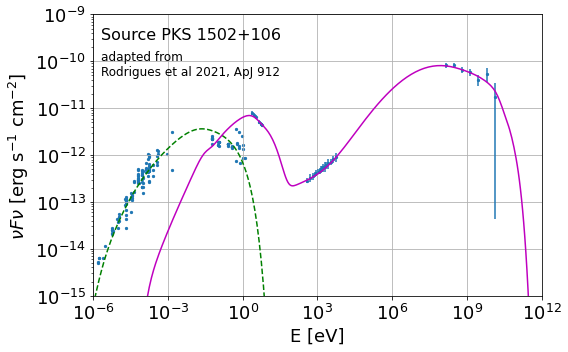

In [51]:
fig = plt.figure(figsize=(8,5))

## Uncomment the lines below 
plt.scatter(photon_energies, converted_flux, s=5) # Data points 
plt.errorbar(photon_energies, converted_flux, converted_error, ls='None') # Error bars

# Here I'm just plotting the model curves for reference
plt.loglog(*lowfreq_model, 'g--') 
plt.loglog(*highfreq_model, 'm-') 

# And these are just for esthetics 
plt.grid()
plt.axis([1e-6,1e12,1e-15,1e-9])
plt.xlabel('E [eV]', fontsize=18)
plt.ylabel(r'$\nu F\nu$ [erg s$^{-1}$ cm$^{-2}$]', 
           fontsize=18)
plt.rcParams['xtick.labelsize'] = 18 
plt.rcParams['ytick.labelsize'] = 18
plt.text(2e-6, 3e-10, "Source PKS 1502+106", 
         fontsize=16)
plt.text(2e-6, 5e-11, "adapted from\n\
Rodrigues et al 2021, ApJ 912", fontsize=12)
plt.tight_layout()

plt.show()